## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

###1. Import and set and Tensorflow 2 and verify version

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

In [115]:
tf.__version__

'2.1.0-rc1'

### 2. Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
import keras

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

###3. Create a list 'class_names' of below Class Names
**Class - Class Name** ==> 
0 - T-shirt, 
1 - Trouser, 
2 - Pullover, 
3 - Dress, 
4 - Coat, 
5 - Sandal, 
6 - Shirt, 
7 - Sneaker, 
8 - Bag, 
9 - Ankle boot,

In [0]:
class_names = [' T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

###4. Find no.of samples in training and test dataset

In [119]:
x_train.shape

(60000, 28, 28)

In [120]:
x_test.shape

(10000, 28, 28)

###5. Find dimensions of an image in the dataset

In [121]:
x_train[0].shape

(28, 28)

In [0]:
# change the dtype to 'float64' 
import numpy as np
x_train = np.array(x_train).astype('float32')
x_test = np.array(x_test).astype('float32')

### 6. Verify if existing labels/Classes are correct 

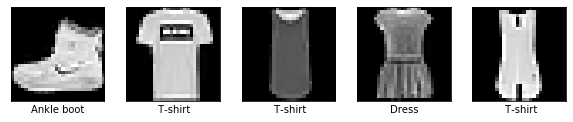

In [123]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

### 7. Convert train and test labels to one hot vectors

** check `tensorflow.keras.utils.to_categorical()` **

In [124]:
y_train.shape

(60000,)

In [0]:
y_train_nrm = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_nrm = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [126]:
y_train_nrm.dtype

dtype('float32')

###8. Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train_nrl = x_train/255
x_test_nrl = x_test/255

In [128]:
print('x_train',type(x_train))
print('y_train',type(y_train))
print('x_test',type(x_test))
print('y_test',type(y_test))

x_train <class 'numpy.ndarray'>
y_train <class 'numpy.ndarray'>
x_test <class 'numpy.ndarray'>
y_test <class 'numpy.ndarray'>


In [129]:
x_train.dtype

dtype('float32')

In [0]:
x_train_reshaped= tf.keras.backend.expand_dims(x_train,axis=-1)



###9. Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras
check `tensorflow.keras.backend.expand_dims`


In [0]:
tf.keras.backend.clear_session()
#Initialize model
model1 = tf.keras.models.Sequential()
#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model1.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

###10. Import the necessary layers from keras to build the model

In [0]:
#normalize data
model1.add(tf.keras.layers.BatchNormalization())

### 11. Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with no.of `epochs=10`. **

In [0]:
#Add first convolutional layer
model1.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model1.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#Flatten the output
model1.add(tf.keras.layers.Flatten())

In [0]:
#Dense layer
model1.add(tf.keras.layers.Dense(128, activation='relu'))

#Output layer
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model1.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [135]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [136]:
#Train the model
model1.fit(x_train,y_train_nrm,          
          validation_data=(x_test,y_test_nrm),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 167us/sample - loss: 0.3569 - accuracy: 0.8721 - val_loss: 0.2770 - val_accuracy: 0.9029
Epoch 2/10
60000/60000 [==============================] - 9s 144us/sample - loss: 0.2119 - accuracy: 0.9214 - val_loss: 0.2597 - val_accuracy: 0.9057
Epoch 3/10
60000/60000 [==============================] - 9s 145us/sample - loss: 0.1390 - accuracy: 0.9477 - val_loss: 0.2679 - val_accuracy: 0.9152
Epoch 4/10
60000/60000 [==============================] - 9s 145us/sample - loss: 0.0853 - accuracy: 0.9685 - val_loss: 0.3265 - val_accuracy: 0.9123
Epoch 5/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.0529 - accuracy: 0.9808 - val_loss: 0.3850 - val_accuracy: 0.9126
Epoch 6/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.0375 - accuracy: 0.9863 - val_loss: 0.4520 - val_accuracy: 0.9067
Epoch 7/10
60000/60000 [=========================

###12. Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
tf.keras.backend.clear_session()
#Initialize model
model2 = tf.keras.models.Sequential()
#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model2.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))
#normalize data
model2.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add first convolutional layer
model2.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))


#Add second convolutional layer
model2.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#Add another dropout layer
model2.add(tf.keras.layers.Dropout(0.25))

#Add MaxPooling layer
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

In [0]:
#Flatten the output
model2.add(tf.keras.layers.Flatten())

In [0]:
#Dense layer
model2.add(tf.keras.layers.Dense(128, activation='relu'))

#Output layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [142]:
#Train the model
model2.fit(x_train,y_train_nrm,          
          validation_data=(x_test,y_test_nrm),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.3509 - accuracy: 0.8735 - val_loss: 0.2921 - val_accuracy: 0.8876
Epoch 2/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.2175 - accuracy: 0.9201 - val_loss: 0.2545 - val_accuracy: 0.9068
Epoch 3/10
60000/60000 [==============================] - 8s 138us/sample - loss: 0.1644 - accuracy: 0.9391 - val_loss: 0.2229 - val_accuracy: 0.9182
Epoch 4/10
60000/60000 [==============================] - 8s 138us/sample - loss: 0.1268 - accuracy: 0.9524 - val_loss: 0.2350 - val_accuracy: 0.9205
Epoch 5/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0984 - accuracy: 0.9634 - val_loss: 0.2521 - val_accuracy: 0.9213
Epoch 6/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.0773 - accuracy: 0.9710 - val_loss: 0.2819 - val_accuracy: 0.9224
Epoch 7/10
60000/60000 [==========================

###13. Verify accuracy of the model

> 

In [143]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4718720   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [144]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

In [0]:
# It can be observed that model accuracy increased with maxpool & dropout.

####14. Verify performance of your model selectively 

In [0]:
predictions = model.predict(x_train)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color='blue')

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(9), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='blue')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

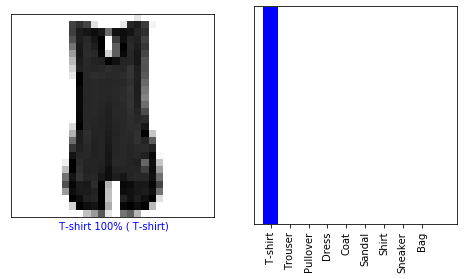

In [147]:
#Replace value of i with other index to check other product
i = 4
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_train, x_train)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_train)
plt.show()

### Now, to the above model, lets add Data Augmentation 

###15. Import the ImageDataGenrator from keras and fit the training images

In [0]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,vertical_flip=True)

In [157]:
x_train_reshaped.ndim

4

In [0]:
datagen.fit(x_train_reshaped)

####16. Showing 5 versions of the first image in training dataset using image datagenerator.flow()

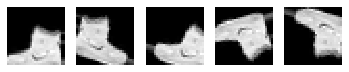

In [159]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_reshaped[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()